## Convolutional Neural Networks

*Ragheed Samkari, 18 January, 2025*

Requirment 1:

1. Load and Normalize the data

Train set: torch.Size([50000, 1, 28, 28]), torch.Size([50000])
Valid set: torch.Size([10000, 1, 28, 28]), torch.Size([10000])
Test set: torch.Size([10000, 1, 28, 28]), torch.Size([10000])


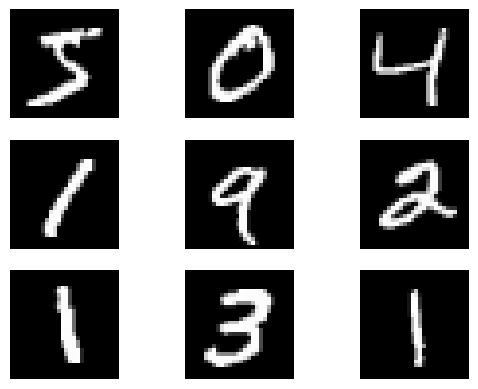

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip


with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')


X_train = train_set[0]
X_valid = valid_set[0]
X_test = test_set[0]


y_train = train_set[1]
y_valid = valid_set[1]
y_test = test_set[1]


X_train_tensor = torch.tensor(X_train / 255.0, dtype=torch.float32).view(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_valid_tensor = torch.tensor(X_valid / 255.0, dtype=torch.float32).view(-1, 1, 28, 28)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)

X_test_tensor = torch.tensor(X_test / 255.0, dtype=torch.float32).view(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Data loaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

# Print shapes to verify
print(f"Train set: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Valid set: {X_valid_tensor.shape}, {y_valid_tensor.shape}")
print(f"Test set: {X_test_tensor.shape}, {y_test_tensor.shape}")

# Visualize a few training examples
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_tensor[i, 0].numpy(), cmap='gray')
    plt.axis('off')
plt.show()

2. Convert Data to PyTorch DataLoaders


In [2]:
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)


3. Define the Convolutional Neural Network (CNN)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2, 2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2, 2)(x)
        x = nn.ReLU()(self.conv3(x))
        x = nn.MaxPool2d(2, 2)(x)
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

model = CNN()


4. Model Summary


In [4]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from torchinfo import summary

summary(model, input_size=(64, 1, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─Conv2d: 1-2                            [64, 32, 14, 14]          4,640
├─Conv2d: 1-3                            [64, 64, 7, 7]            18,496
├─Linear: 1-4                            [64, 128]                 73,856
├─Linear: 1-5                            [64, 64]                  8,256
├─Linear: 1-6                            [64, 10]                  650
Total params: 106,058
Trainable params: 106,058
Non-trainable params: 0
Total mult-adds (M): 129.53
Input size (MB): 0.20
Forward/backward pass size (MB): 11.34
Params size (MB): 0.42
Estimated Total Size (MB): 11.97

5. Train the Model

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 0.3379518252957012
Epoch 2/10, Loss: 0.08800339661574329
Epoch 3/10, Loss: 0.060327510425822135
Epoch 4/10, Loss: 0.046179734873097115
Epoch 5/10, Loss: 0.03914124216831377
Epoch 6/10, Loss: 0.03173566026083665
Epoch 7/10, Loss: 0.025594876053516933
Epoch 8/10, Loss: 0.023032373194425703
Epoch 9/10, Loss: 0.021250352494599514
Epoch 10/10, Loss: 0.016673997189033386


In [7]:
print(f"Min: {X_train.min()}, Max: {X_train.max()}")
print(f"Labels: {set(y_train)}")


Min: 0.0, Max: 0.99609375
Labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


6. Test the Model

In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 99.10%


Requirment 2:




1. Modified CNN with Batch Normalization and Dropout

In [9]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.ReLU()(self.bn1(self.conv1(x)))
        x = nn.MaxPool2d(2, 2)(x)
        x = nn.ReLU()(self.bn2(self.conv2(x)))
        x = nn.MaxPool2d(2, 2)(x)
        x = nn.ReLU()(self.bn3(self.conv3(x)))
        x = nn.MaxPool2d(2, 2)(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.dropout(nn.ReLU()(self.fc2(x)))
        x = self.fc3(x)
        return x

improved_model = ImprovedCNN()

from torchinfo import summary
summary(improved_model, input_size=(64, 1, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
ImprovedCNN                              [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─BatchNorm2d: 1-2                       [64, 16, 28, 28]          32
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─BatchNorm2d: 1-4                       [64, 32, 14, 14]          64
├─Conv2d: 1-5                            [64, 64, 7, 7]            18,496
├─BatchNorm2d: 1-6                       [64, 64, 7, 7]            128
├─Linear: 1-7                            [64, 128]                 73,856
├─Dropout: 1-8                           [64, 128]                 --
├─Linear: 1-9                            [64, 64]                  8,256
├─Dropout: 1-10                          [64, 64]                  --
├─Linear: 1-11                           [64, 10]                  650
Total params: 106,282
Trainable params: 106,282
Non-trainable params

2. Train the Improved Model

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(improved_model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    improved_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = improved_model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/10, Loss: 0.3974495817147329
Epoch 2/10, Loss: 0.13301613014739225
Epoch 3/10, Loss: 0.09566978553918612
Epoch 4/10, Loss: 0.08463802025623648
Epoch 5/10, Loss: 0.06838511214315411
Epoch 6/10, Loss: 0.06271772463749403
Epoch 7/10, Loss: 0.05530201284343775
Epoch 8/10, Loss: 0.05123226963633569
Epoch 9/10, Loss: 0.04718756463455782
Epoch 10/10, Loss: 0.04252155179433558


3. Test the Improved Model

In [11]:
improved_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = improved_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

improved_accuracy = 100 * correct / total
print(f"Improved Test Accuracy: {improved_accuracy:.2f}%")


Improved Test Accuracy: 99.14%


Requirment 3:

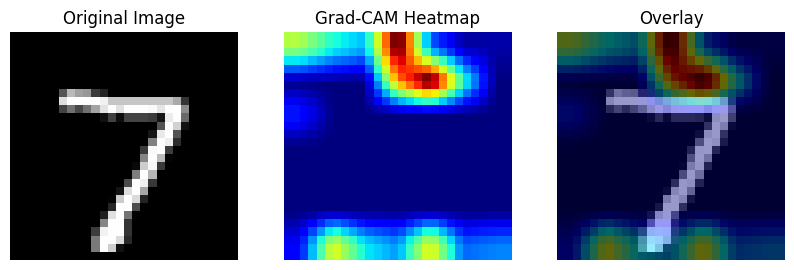

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.target_layer.register_forward_hook(self.save_activations)

    def save_activations(self, module, input, output):
        """Save the activations and register a hook on the output to capture gradients."""
        self.activations = output
        output.register_hook(self.save_gradients)  # Attach hook to the output tensor

    def save_gradients(self, grad):
        """Save the gradients from the backward pass."""
        self.gradients = grad

    def generate_heatmap(self, input_tensor, target_class):
        # Forward pass
        output = self.model(input_tensor)
        self.model.zero_grad()

        # Backward pass for the target class
        target = output[0, target_class]
        target.backward()

        # Compute Grad-CAM
        weights = torch.nn.functional.adaptive_avg_pool2d(self.gradients, (1, 1)).squeeze()
        activations = self.activations.squeeze()

        heatmap = torch.zeros(activations.shape[1:], dtype=torch.float32)
        for i, w in enumerate(weights):
            heatmap += w * activations[i]

        heatmap = torch.relu(heatmap).detach().numpy()
        heatmap = cv2.resize(heatmap, (28, 28))
        heatmap /= np.max(heatmap)  # Normalize to [0, 1]
        return heatmap


# Select a test image
test_image = X_test_tensor[0:1]
test_label = y_test_tensor[1].item()

# Define target layer (last convolutional layer)
target_layer = improved_model.conv3
grad_cam = GradCAM(improved_model, target_layer)

# Set model to evaluation mode
improved_model.eval()

# Generate heatmap
heatmap = grad_cam.generate_heatmap(test_image, target_class=test_label)

# Extract original image
original_image = test_image[0, 0].detach().numpy()

# Resize heatmap to match input dimensions
heatmap_resized = (heatmap * 255).astype(np.uint8)
heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

# Convert grayscale image to 3 channels
original_image_rescaled = (original_image * 255).astype(np.uint8)
original_image_3channel = cv2.cvtColor(original_image_rescaled, cv2.COLOR_GRAY2BGR)

# Blend heatmap and original image
overlay = cv2.addWeighted(original_image_3channel, 0.6, heatmap_colored, 0.4, 0)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap_resized, cmap='jet')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')

plt.show()
